In [1]:
import os
import pandas as pd
from config_file import data_path

path = os.path.join(data_path, "sessions.jsonl")
df = pd.read_json(path, orient="records", lines=True)

In [2]:
df.head()

,timestamp,user_id,track_id,event_type,session_id
0,2020-10-21 20:41:02.953054,101,46JGVfEEiBScTaiP3Bnh27,play,124
1,2020-10-21 20:41:55.245054,101,46JGVfEEiBScTaiP3Bnh27,skip,124
2,2020-10-21 20:41:55.245054,101,,advertisement,124
3,2020-10-21 20:42:01.245054,101,6s8q3fQNcayP7yEFpuF3wz,play,124
4,2020-10-21 20:45:17.538054,101,3gs2PO5BKRG9oVUDvi59b2,play,124


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23613691 entries, 0 to 23613690
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   timestamp   datetime64[ns]
 1   user_id     int64         
 2   track_id    object        
 3   event_type  object        
 4   session_id  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 900.8+ MB


In [4]:
df.describe()

,timestamp,user_id,session_id
count,23613691,2.361369e+07,2.361369e+07
mean,2022-06-24 23:00:53.411408896,3.536195e+02,3.092403e+05
min,2019-07-08 02:29:20.979474,1.010000e+02,1.240000e+02
25%,2021-10-02 01:06:11.986925056,2.280000e+02,1.592160e+05
50%,2022-08-30 09:29:19.182095104,3.530000e+02,3.078510e+05
75%,2023-05-09 00:48:17.325186816,4.770000e+02,4.624880e+05
max,2023-12-04 02:08:45.864866,6.000000e+02,6.126180e+05
std,NaN,1.442949e+02,1.761896e+05


In [5]:
from matplotlib import pyplot as plt
def plot_hist(df, col):
    col_info = [df[col].notnull().sum(), df[col].isnull().sum()]
    print(f"not null: {col_info[0]}, null: {col_info[1]}")
    plt.bar(["not null", "null"], col_info)
    for i, v in enumerate(col_info):
        plt.text(i, v, str(v), color="blue", fontweight="bold")
    plt.title(col)
    plt.show()

not null: 23613691, null: 0


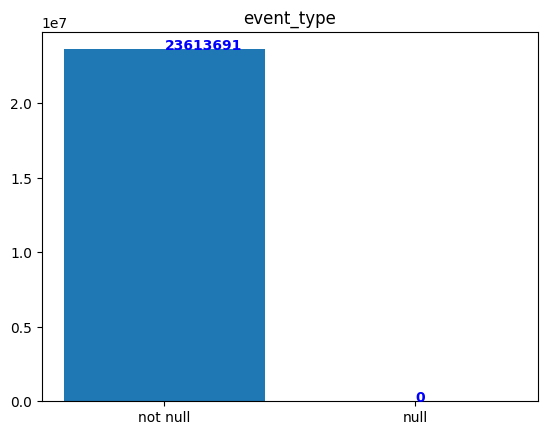

In [6]:
plot_hist(df, "event_type")

In [7]:
df_play = df[df["event_type"]=="play"]
df_play = df_play[["timestamp", "track_id"]]
df_play.head()

,timestamp,track_id
0,2020-10-21 20:41:02.953054,46JGVfEEiBScTaiP3Bnh27
3,2020-10-21 20:42:01.245054,6s8q3fQNcayP7yEFpuF3wz
4,2020-10-21 20:45:17.538054,3gs2PO5BKRG9oVUDvi59b2
5,2020-10-21 20:49:23.591054,0eNGwmFaIeEKQgudTcs1rV
7,2020-10-21 20:55:47.137054,2ifYUfvMNbXQDPJEyk68rP


not null: 13741714, null: 0


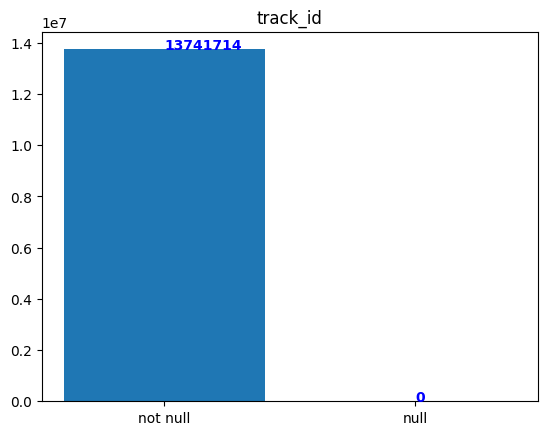

In [8]:
plot_hist(df_play, "track_id")

In [9]:
df_play = df_play[df_play["track_id"].notnull()]

In [10]:
df_play["timestamp"].min(), df_play["timestamp"].max()

(Timestamp('2019-07-08 02:29:20.979474'),
 Timestamp('2023-12-04 02:05:18.712866'))

In [15]:
df_play["year"] = df_play["timestamp"].dt.year
df_play["month"] = df_play["timestamp"].dt.month
df_play["week"] = df_play["timestamp"].dt.dayofyear // 7
df_play.head()

,timestamp,track_id,month,week,year
0,2020-10-21 20:41:02.953054,46JGVfEEiBScTaiP3Bnh27,10,42,2020
3,2020-10-21 20:42:01.245054,6s8q3fQNcayP7yEFpuF3wz,10,42,2020
4,2020-10-21 20:45:17.538054,3gs2PO5BKRG9oVUDvi59b2,10,42,2020
5,2020-10-21 20:49:23.591054,0eNGwmFaIeEKQgudTcs1rV,10,42,2020
7,2020-10-21 20:55:47.137054,2ifYUfvMNbXQDPJEyk68rP,10,42,2020


<Axes: xlabel='year'>

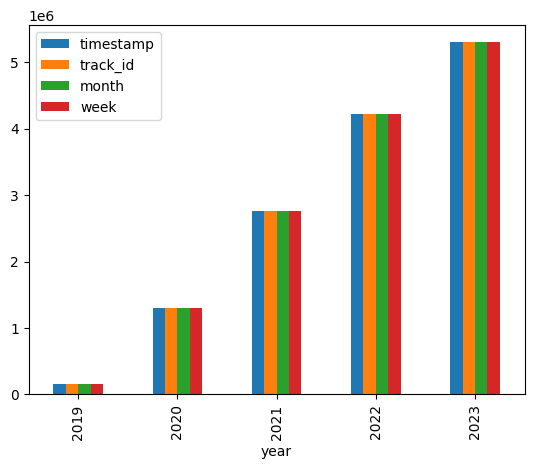

In [16]:
df_play.groupby("year").count().plot.bar()

<Axes: xlabel='year,month'>

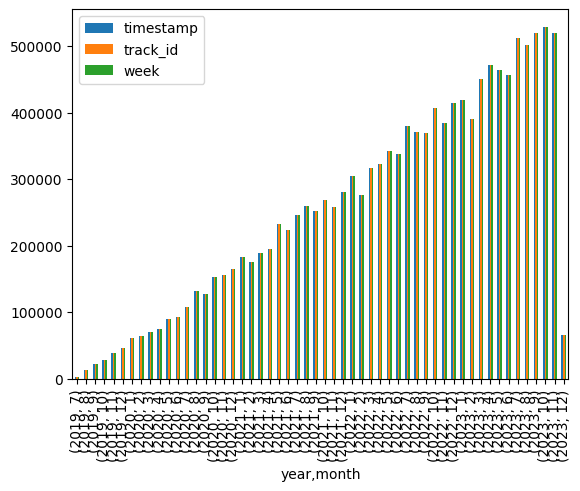

In [17]:
# make plot how many tracks played in each month
df_play.groupby(["year", "month"]).count().plot.bar()

<Axes: xlabel='year,week'>

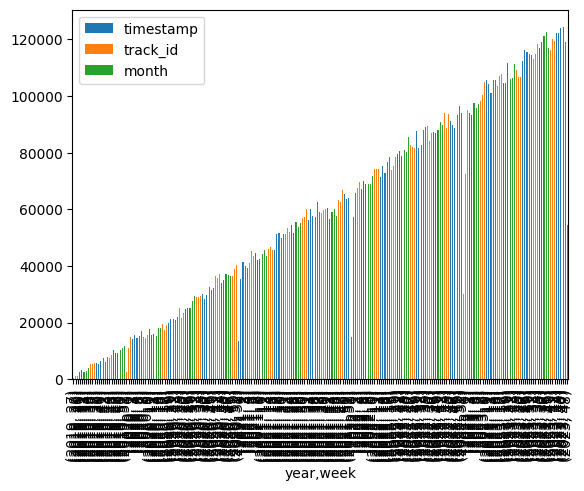

In [18]:
# make plot how many tracks played in each week
df_play.groupby(["year", "week"]).count().plot.bar()

#### sum up
Fine?